In [2]:
#pip install tweepy 
import tweepy
import json 
import datetime
import pandas as pd

consumer_key = '########'  # Add your API key here
consumer_secret = '#######'  # Add your API secret key here
access_token = '#######'
access_token_secret = '#######'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [3]:
#!pip install textblob


In [4]:
#!pip install wordcloud

In [5]:
#!pip install langdetect

In [6]:
#nltk.download('vader_lexicon')

In [7]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [331]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#query = 'ClimateChange OR FridaysForFuture'
query = 'ClimateChange OR FridaysForFuture OR ClimateEmergency OR ClimateStrike OR TheParisAgreement OR GlobalWarming'
#keyword = input(“Please enter keyword or hashtag to search: “)
noOfTweet = 500
tweets = tweepy.Cursor(api.search, q=query).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
        
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [318]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  500
positive number:  166
negative number:  150
neutral number:  184


In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result" )
plt.axis('equal')
plt.show()

In [320]:
tweet_list.drop_duplicates(inplace = True)

In [321]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub('[^A-Za-z0-9]+',' ',x)
#rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @DavidFopp: ""The Swedish politicians have t...",the swedish politicians have to stop pretendi...
1,RT @vjack: Covid-19 paused climate emissions –...,covid 19 paused climate emissions but they re...
2,"RT @WMO: ""A gloomy threshold.""\n2021 is expect...",a gloomy threshold 2021 is expected to be the...
3,"RT @IPBES: 🌊🇪🇸 The green, underwater meadows o...",the green underwater meadows of posidonia sea...
4,"RT @AaravSeth_: ""Why are you so afraid of hear...",why are you so afraid of hearing the truth va...
5,Climate crisis: recent European droughts 'wors...,climate crisis recent european droughts worst ...
6,"RT @PaulEDawson: ""We've upset the energy balan...",we ve upset the energy balance of the entire ...
7,Boot oder Fahrrad? Entscheide selbst:\nAuf htt...,boot oder fahrrad entscheide selbst auf https ...
8,Breaking #ClimateChange News: New invasive spe...,breaking climatechange news new invasive speci...
9,RT @allan_crawshaw: GLOBAL CLIMATE STRIKE #Fri...,global climate strike fridaysforfuture march ...


In [322]:
#!pip install vaderSentiment

In [329]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(row)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']

tw_list['neg'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['neg'])
tw_list['neu'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['neu'])
tw_list['pos'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['pos'])
tw_list['compound'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

tw_list.head(10)


,0,text,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,"RT @DavidFopp: ""The Swedish politicians have t...",the swedish politicians have to stop pretendi...,0.400000,0.600000,0.278,0.661,0.062,-0.7096,NaN
1,RT @vjack: Covid-19 paused climate emissions –...,covid 19 paused climate emissions but they re...,0.000000,0.000000,0.000,1.000,0.000,0.0000,NaN
2,"RT @WMO: ""A gloomy threshold.""\n2021 is expect...",a gloomy threshold 2021 is expected to be the...,0.162500,0.333333,0.068,0.932,0.000,-0.1531,NaN
3,"RT @IPBES: 🌊🇪🇸 The green, underwater meadows o...",the green underwater meadows of posidonia sea...,0.200000,0.600000,0.000,0.853,0.147,0.4754,NaN
4,"RT @AaravSeth_: ""Why are you so afraid of hear...",why are you so afraid of hearing the truth va...,-0.600000,0.900000,0.000,0.867,0.133,0.3182,NaN
5,Climate crisis: recent European droughts 'wors...,climate crisis recent european droughts worst ...,-0.333333,0.416667,0.353,0.647,0.000,-0.8481,NaN
6,"RT @PaulEDawson: ""We've upset the energy balan...",we ve upset the energy balance of the entire ...,-0.200000,0.512500,0.230,0.685,0.085,-0.5574,NaN
7,Boot oder Fahrrad? Entscheide selbst:\nAuf htt...,boot oder fahrrad entscheide selbst auf https ...,0.000000,0.000000,0.000,1.000,0.000,0.0000,NaN
8,Breaking #ClimateChange News: New invasive spe...,breaking climatechange news new invasive speci...,0.136364,0.454545,0.000,1.000,0.000,0.0000,NaN
9,RT @allan_crawshaw: GLOBAL CLIMATE STRIKE #Fri...,global climate strike fridaysforfuture march ...,0.033333,0.033333,0.086,0.914,0.000,-0.1280,NaN


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["neg"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"] 
tw_list_neutral = tw_list[tw_list["sentiment"]== 1]

In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

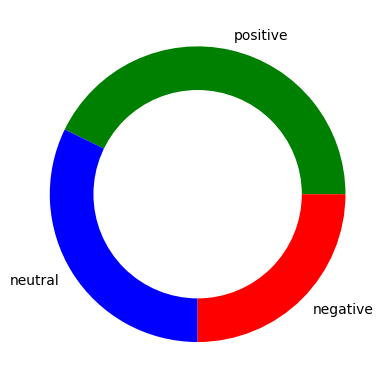

In [316]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size= pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
########################### 
# Second Script # 

In [8]:
query = 'ClimateChange OR FridaysForFuture OR ClimateEmergency OR ClimateStrike OR TheParisAgreement OR GlobalWarming'

noOfTweet = 300

In [35]:
tw_list = pd.DataFrame(
    [tweet.author.screen_name, tweet.text, tweet.created_at] for tweet in tweepy.Cursor(api.search, q=query, lang='en').items(noOfTweet)
)

In [36]:
tw_list.columns = ["user_account","text", "created_at"]
tw_list.head()

,user_account,text,created_at
0,FFFBot1,RT @DelilahforTexas: This is my family at the ...,2021-04-06 11:08:02
1,meiklwagner,RT @meiklwagner: Some Things Are Better Left U...,2021-04-06 11:08:02
2,FFFBot1,RT @sosfromthekids: Week 51 of #ClimateStrikeO...,2021-04-06 11:07:52
3,MrCastrigano,"RT @subjecttoclimat: 👇Teachers, comment below ...",2021-04-06 11:07:49
4,fmotta100,RT @MikeHudema: Here is a 90 second video summ...,2021-04-06 11:07:32


In [37]:
tw_list['text'] = tw_list['text'].str.lower()\
.str.replace('(@[a-z0-9]+)\w+',' ')\
.str.replace('(http\S+)', ' ')\
.str.replace('([^0-9a-z \t])',' ')\
.str.replace(' +',' ')\
.str.replace('(&gt)', '')\
.str.replace('(\xa0)', '')\
.str.replace('(&amp)', '')\
.str.replace('(amp)', '')\
.str.replace('(&lt)', '')\
.str.replace('(<a).*(>).*(</a>)', '')\
.str.replace("(<br/>)", "")\
.str.replace("(rt)", "")

tw_list.head(n=10)

,user_account,text,created_at
0,FFFBot1,this is my family at the pipeline protest fri...,2021-04-06 11:08:02
1,meiklwagner,some things are better left unsaid daryl hall...,2021-04-06 11:08:02
2,FFFBot1,week 51 of climatestrikeonline the climate em...,2021-04-06 11:07:52
3,MrCastrigano,teachers comment below to let us know what ty...,2021-04-06 11:07:49
4,fmotta100,here is a 90 second video summary of climate ...,2021-04-06 11:07:32
5,FFFBot1,week 12 of my digital strike for the climate ...,2021-04-06 11:07:10
6,FFFBot1,appreciating the effos of deepasri naveenawan...,2021-04-06 11:07:09
7,LaguirreGM,biden s americanjobsplan would simultaneously...,2021-04-06 11:06:59
8,uziibad,,2021-04-06 11:06:59
9,inbusiness4good,eahday eahoptimism you are invited to join th...,2021-04-06 11:06:52


In [38]:
tw_list.drop_duplicates(inplace=True)

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(row)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']

tw_list['neg'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['neg'])
tw_list['neu'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['neu'])
tw_list['pos'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['pos'])
tw_list['compound'] = tw_list['text'].apply(lambda x:SentimentIntensityAnalyzer().polarity_scores(x)['compound'])

tw_list.head(10)

,user_account,text,created_at,polarity,subjectivity,neg,neu,pos,compound
0,FFFBot1,this is my family at the pipeline protest fri...,2021-04-06 11:08:02,0.00,0.00,0.200,0.800,0.000,-0.2500
1,meiklwagner,some things are better left unsaid daryl hall...,2021-04-06 11:08:02,0.25,0.25,0.000,0.838,0.162,0.4404
2,FFFBot1,week 51 of climatestrikeonline the climate em...,2021-04-06 11:07:52,0.00,0.00,0.191,0.809,0.000,-0.3818
3,MrCastrigano,teachers comment below to let us know what ty...,2021-04-06 11:07:49,0.00,0.00,0.000,0.936,0.064,0.0772
4,fmotta100,here is a 90 second video summary of climate ...,2021-04-06 11:07:32,0.00,0.00,0.000,0.766,0.234,0.6369
5,FFFBot1,week 12 of my digital strike for the climate ...,2021-04-06 11:07:10,0.00,0.00,0.089,0.774,0.137,0.2023
6,FFFBot1,appreciating the effos of deepasri naveenawan...,2021-04-06 11:07:09,0.00,0.00,0.000,0.805,0.195,0.4404
7,LaguirreGM,biden s americanjobsplan would simultaneously...,2021-04-06 11:06:59,0.60,0.55,0.000,0.750,0.250,0.6124
8,uziibad,,2021-04-06 11:06:59,0.00,0.00,0.000,0.000,0.000,0.0000
9,inbusiness4good,eahday eahoptimism you are invited to join th...,2021-04-06 11:06:52,0.00,0.00,0.000,0.833,0.167,0.2960


In [40]:
from nltk.corpus import stopwords

In [41]:
#nltk.download('stopwords')

In [42]:
additional  = ['rt','rts','retweet'] #we'll store additional stopwords here
swords = set().union(stopwords.words('english'),additional)

In [43]:
tw_list.drop_duplicates(subset='text',inplace=True)

In [44]:
tw_list['text'] = tw_list['text'].str.lower()\
.str.replace('(@[a-z0-9]+)\w+',' ')\
.str.replace('(http\S+)', ' ')\
.str.replace('([^0-9a-z \t])',' ')\
.str.replace(' +',' ')\
.str.replace('(&gt)', '')\
.str.replace('(\xa0)', '')\
.str.replace('(&amp)', '')\
.str.replace('(&lt)', '')\
.str.replace('(<a).*(>).*(</a>)', '')\
.str.replace("(<br/>)", "")\
.apply(lambda x: [i for i in x.split() if not i in swords])
#  ReviewText = ReviewText.str.replace("(<br/>)", "")
#     ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
#     ReviewText = ReviewText.str.replace('(&amp)', '')
#     ReviewText = ReviewText.str.replace('(&gt)', '')
#     ReviewText = ReviewText.str.replace('(&lt)', '')
#     ReviewText = ReviewText.str.replace('(\xa0)', ' ')  

In [45]:
tw_list.head(n=20) 

,user_account,text,created_at,polarity,subjectivity,neg,neu,pos,compound
0,FFFBot1,"[family, pipeline, protest, fridaysforfuture]",2021-04-06 11:08:02,0.000000,0.000000,0.200,0.800,0.000,-0.2500
1,meiklwagner,"[things, better, left, unsaid, daryl, hall, jo...",2021-04-06 11:08:02,0.250000,0.250000,0.000,0.838,0.162,0.4404
2,FFFBot1,"[week, 51, climatestrikeonline, climate, emerg...",2021-04-06 11:07:52,0.000000,0.000000,0.191,0.809,0.000,-0.3818
3,MrCastrigano,"[teachers, comment, let, us, know, type, teach...",2021-04-06 11:07:49,0.000000,0.000000,0.000,0.936,0.064,0.0772
4,fmotta100,"[90, second, video, summary, climate, change, ...",2021-04-06 11:07:32,0.000000,0.000000,0.000,0.766,0.234,0.6369
5,FFFBot1,"[week, 12, digital, strike, climate, please, s...",2021-04-06 11:07:10,0.000000,0.000000,0.089,0.774,0.137,0.2023
6,FFFBot1,"[appreciating, effos, deepasri, naveenawangara...",2021-04-06 11:07:09,0.000000,0.000000,0.000,0.805,0.195,0.4404
7,LaguirreGM,"[biden, americanjobsplan, would, simultaneousl...",2021-04-06 11:06:59,0.600000,0.550000,0.000,0.750,0.250,0.6124
8,uziibad,[],2021-04-06 11:06:59,0.000000,0.000000,0.000,0.000,0.000,0.0000
9,inbusiness4good,"[eahday, eahoptimism, invited, join, nextgen, ...",2021-04-06 11:06:52,0.000000,0.000000,0.000,0.833,0.167,0.2960


In [46]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [47]:
tw_list['stemmed'] = tw_list['text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [48]:
import nltk.sentiment.vader as vd
from nltk import download
#download('vader_lexicon')

In [49]:
sia = vd.SentimentIntensityAnalyzer()

In [50]:
from nltk.tokenize import word_tokenize

In [51]:
#nltk.download('punkt')

In [52]:
tw_list['sentiment_score'] = tw_list['text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )

In [53]:
tw_list[['text','sentiment_score']].head(n=10)

,text,sentiment_score
0,"[family, pipeline, protest, fridaysforfuture]",-0.2500
1,"[things, better, left, unsaid, daryl, hall, jo...",0.4404
2,"[week, 51, climatestrikeonline, climate, emerg...",-0.3818
3,"[teachers, comment, let, us, know, type, teach...",0.0772
4,"[90, second, video, summary, climate, change, ...",0.7631
5,"[week, 12, digital, strike, climate, please, s...",0.1902
6,"[appreciating, effos, deepasri, naveenawangara...",0.4404
7,"[biden, americanjobsplan, would, simultaneousl...",0.7136
8,[],0.0000
9,"[eahday, eahoptimism, invited, join, nextgen, ...",0.2960


In [54]:
tw_list['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 0    203
 1     31
-1     17
 2      3
-2      1
Name: sentiment_score, dtype: int64

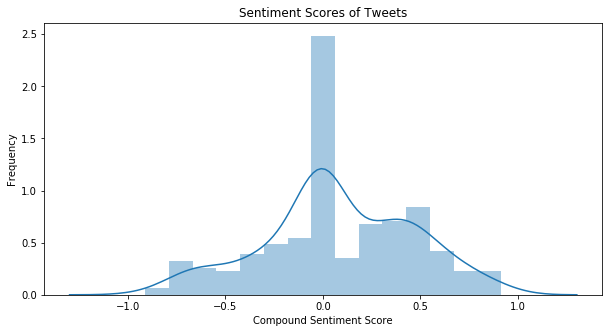

In [67]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(tw_list['compound'], bins=15, ax=ax)
ax.set(title='Sentiment Scores of Tweets', xlabel='Compound Sentiment Score', ylabel='Frequency')
plt.savefig('Sentiment.png')
plt.show()

In [58]:
import datetime as dt
import seaborn as sns

In [60]:
tw_list.sort_values(by='created_at', inplace=True)
tw_list.index = pd.to_datetime(tw_list['created_at'])
tw_list['mean'] = tw_list['compound'].expanding().mean()
tw_list['rolling'] = tw_list['compound'].rolling('6h').mean()

In [64]:
ot = tw_list.sample(frac=.1, random_state=1111)
ot.sort_index(inplace=True)
ot['mean'] = ot['compound'].expanding().mean()
ot['rolling'] = ot['compound'].rolling('6h').mean()
plt.show()

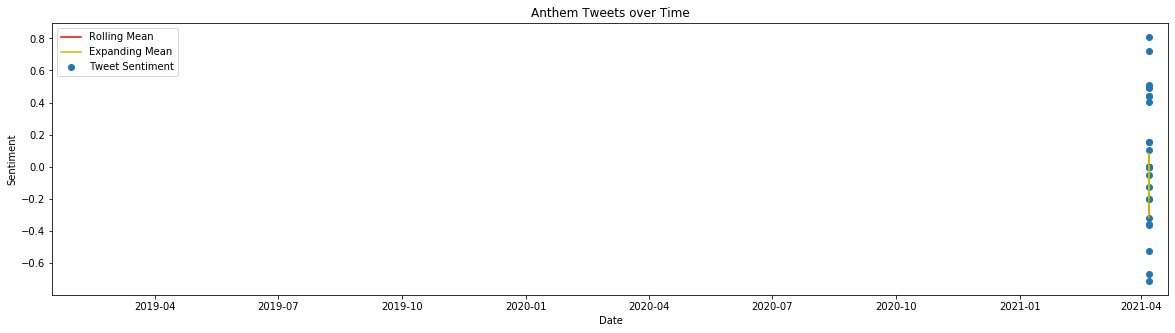

In [65]:
fig = plt.figure(figsize=(20,5))
ax=fig.add_subplot(111)
ax.scatter(ot['created_at'],ot['compound'], label='Tweet Sentiment')
ax.plot(ot['created_at'],ot['rolling'], color ='r', label='Rolling Mean')
ax.plot(ot['created_at'],ot['mean'], color='y', label='Expanding Mean')
ax.set_xlim([dt.date(2019,1,15),dt.date(2021,4,21)])
ax.set(title='Anthem Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')


In [ ]:
tw_list[tw_list['sentiment_score'] > 1]

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in tw_list["text"]: 
      
    # typecaste each val to string 
    val = str(val) 
    #print(val)
  
    # split the value 
    tokens = val.split() 
    
    #print(tokens[1])
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].replace("'",'').lower() 
        
    
    comment_words += " ".join(tokens)+" "
    

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 